# Felipe Veloso Desafio 9 - Desafío - Gráficos y correlación

1. Importar librerías y .csv

In [171]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
plt.style.use('seaborn')

In [172]:
df = pd.read_csv('nations.csv',sep = ',', encoding='ISO-8859-1')

Se presenta error en la codificacion del archivo original, se setea en ISO-8859-1

In [173]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


2. Refactor gráficos matplotlib a seaborn

/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


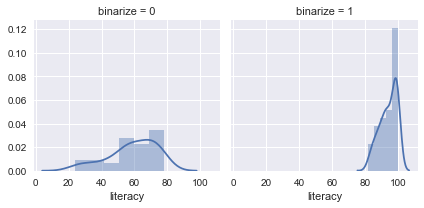

In [174]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    grid = sns.FacetGrid(tmp , col="binarize",col_wrap=2)
    grid = grid.map(sns.distplot, variable)
binarize_histogram(df,'literacy')

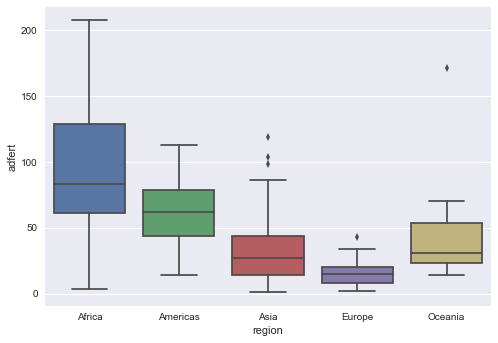

In [175]:
#Separar en graficos distintos
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    #stratify_by = tmp[group_by].unique
    ax = sns.boxplot(y=variable, x=group_by, data=tmp)
grouped_boxplot(df, 'adfert', 'region')

opcion b

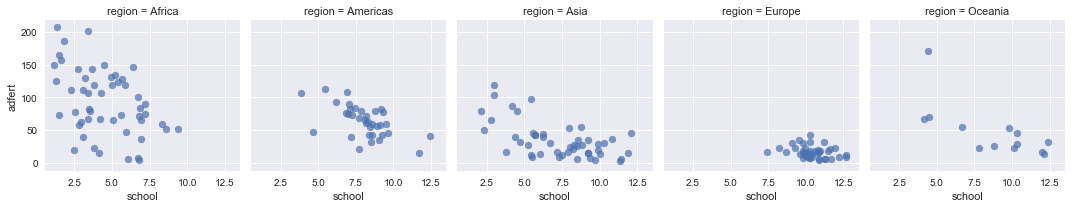

In [176]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    g = sns.FacetGrid(tmp, col=group_by)
    g.map(plt.scatter, x, y, alpha=.7)
    g.add_legend();
grouped_scatterplot(df, 'school', 'adfert', 'region')

3. Genere un heatmap entre todas las variables

In [177]:
#femlab , literacy y school 

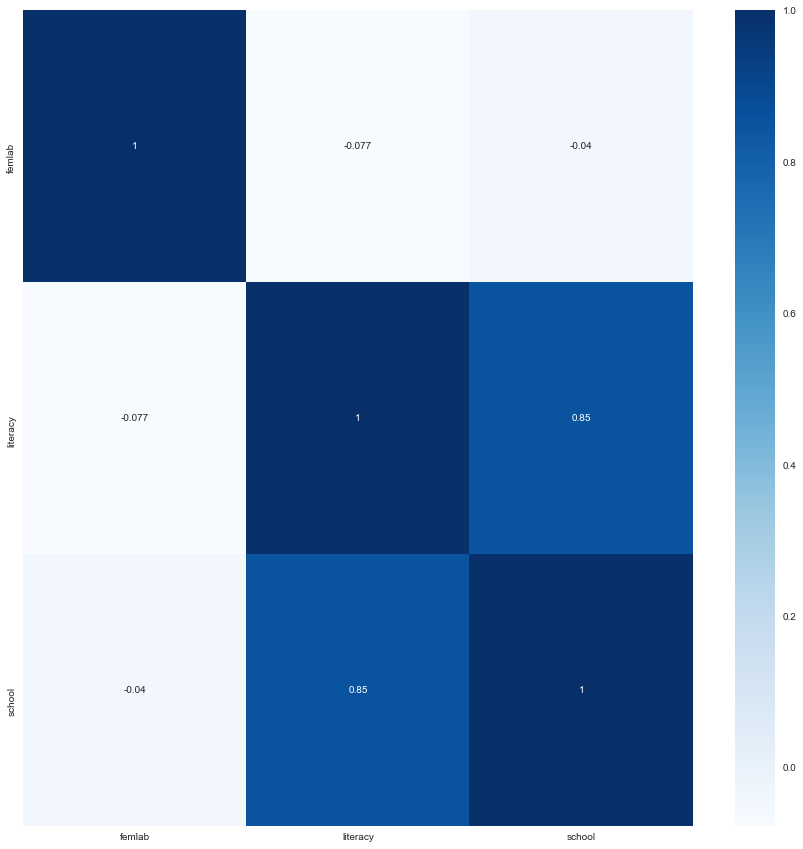

In [178]:
subset = df.filter(items = ['femlab','literacy','school']).dropna()
plt.figure(figsize=(15,15))
sns.heatmap(subset.corr(),cmap='Blues', annot=True)

La variable de literacy con school tienen una alta correlacion

4. En base a las principales correlaciones, sepárelas en un
nuevo objeto y calcule la matriz de correlaciones para todas
las regiones

In [195]:
tmp = df.loc[:, ['femlab','literacy','school','region']]
tmp_region = tmp['region'].unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

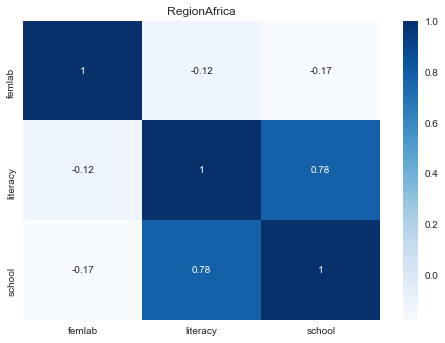

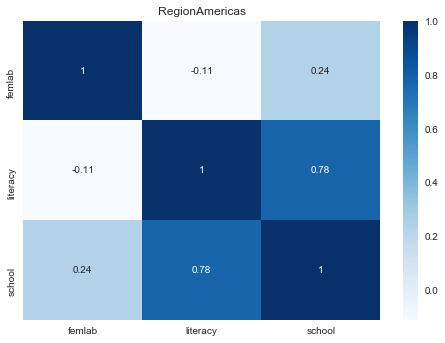

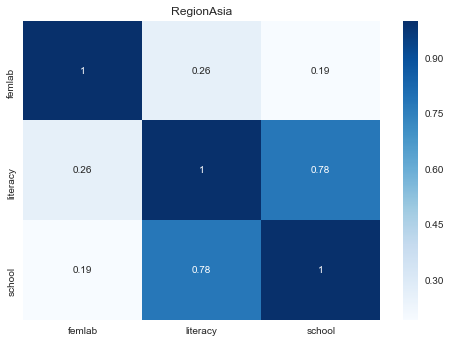

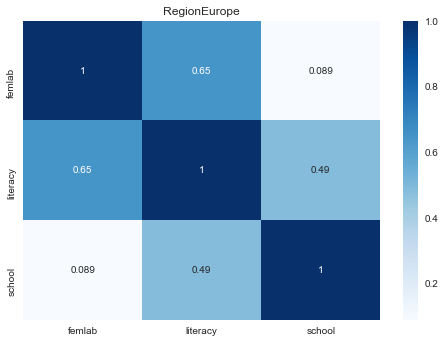

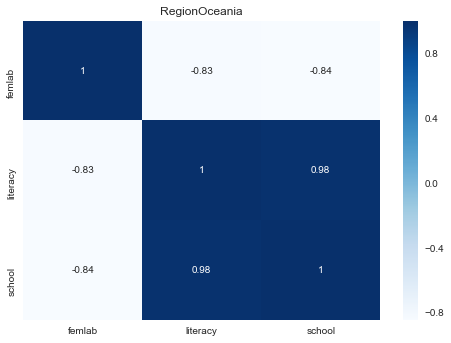

In [196]:
for region in tmp_region:
    tmp_region = tmp[tmp['region'] == region]
    tmp_subset_region = tmp_region.loc[:,['femlab','literacy','school']].dropna()
    sns.heatmap(tmp_subset_region.corr() ,cmap='Blues', annot=True)
    plt.title('Region' + region)
    plt.show()

Las principales correlaciones avistadas son school con literacy, estan altamente relacionadas.